Usefull links:

https://www.youtube.com/watch?v=2Mg8QD0F1dQ

https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile/output

https://www.youtube.com/watch?v=nyxTdL_4Q-Q

https://www.youtube.com/watch?v=LsK-xG1cLYA


# Random Forest:
1. we make a bootstrap samples which have the same size of original dataset but we allow that some data(samples) can be picked more than onces.
2. When we want to make a tree in each step from root to leave we only consider some of features(columns) we make a decision between them until and make a 1 complete tree.
3. We go back to the level one and make a new boosttrap sample and make a new tree base on part 2. 
4. Since we allow repeat of data to make a bosttrap sample normally 30 percent of data is not used to creat that specific tree we can use them to evaluate that specific tree.(Out of bag samples.)



#  Adabost:
1. we deal with a weak learners like stumps which is a node and 2 leaves
2. In random forest each tree and same weight but here they have different weights.
3. Here each tree is built from the error of previous stump so the order is important.



#  Process:
1. we give each sample a weight through each stump to show how important is that to correctly classified. at the begining they have a same weight. Correctly classified samples reduce their weights and incorrect one increases so they have more chance to be picked in the new bosttrap sampling for the next tree classification.
2. At the new sample collection we have more of samples which was misclassified. so again we give equal weight to each of them and redo the process.


Gradient Boost:
In adabost the importance of each stump is different base on the amount of say but in GB tree have similar importance and we scale them in each step.

In adabost we have stump small trees but in GB we have complete tree with 8 to 32 leaves.

# Gradient Boost 

## Regression

1. When we want to predict a continous value the first guess it the average of all predictions (target). For example if we want to predict the weight of some people the first step is their average weights

2. we make a new column  as a residual of average minus real weight of individual people. 

3. We train a tree  with the fixed number of leaves base on the new column 

4. The samples which land in the same leaves at the end we need to average over their residual error and use them in the new tree process.

5. new prediction of wieght = average weight (at the first guess) + (learning rate *  residuals of tree 1)

6. new residual = real weight - predicted weight from previous tree


Problems:

- GB involves an exhaustive search procedure.

- Each CART is trained to nd the best split points and features.

- May lead to CARTs using the same split points and maybe the same features.



## Stochastic Gradient Boosting

- Each tree is trained on a random subset of rows of the training data.

- The sampled instances (40%-80% of the training set) are sampled without replacement.

- Features are sampled (without replacement) when choosing split points.

- Result: further ensemble diversity. Effect: adding further variance to the ensemble of trees.

## Classification

1. we start with a single leave which is the log(odds)
Example: 4 people say yes and 2 people says no = log(4/2)= 0.7. Then we change it to the porbability by this 
formula:  e^(log(odds)/(1+ e^(log(odds))

2. We calculate the residual. Predictions are codisered as 0 or 1.
3. we do the same process



# Dataset: Bike Sharing Demand
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.


Data Fields
datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [225]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
import pandas as pd

import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [230]:
df = pd.read_csv('dataset/bikes/train.csv')


df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


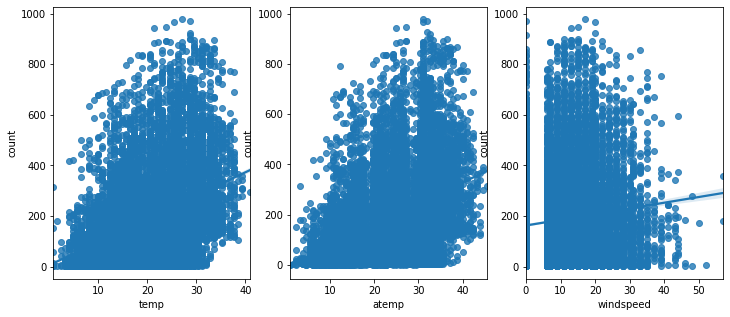

In [231]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=df,ax=ax1)
sn.regplot(x="atemp", y="count", data=df,ax=ax2)
sn.regplot(x="windspeed", y="count", data=df,ax=ax3)

#  Create day-of-week features
We can engineer datetime features to add even more information for our models. Most datetimes have lots of information in them -- year, month, day, and sometimes hour, minute, and second. But we can also get the day of the week, and things like the quarter of the year, or the elapsed time since some event (e.g. earnings reports).


#  Create hour of the day features


In [232]:
# split the datetime to hour. first split by the space and then ':'
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(':')[0])

# Change to month
df["month"] = df.datetime.apply(lambda x : x.split()[0].split('-')[1])

df["year"] = df.datetime.apply(lambda x : x.split()[0].split('-')[0])


# Change to day of week
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week'] = df['datetime'].dt.day_name()
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00,01,2011,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01,01,2011,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02,01,2011,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03,01,2011,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04,01,2011,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,12,2012,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,12,2012,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,12,2012,Wednesday


In [233]:
print(df.dtypes)

datetime       datetime64[ns]
season                  int64
holiday                 int64
workingday              int64
weather                 int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
count                   int64
hour                   object
month                  object
year                   object
day_of_week            object
dtype: object


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

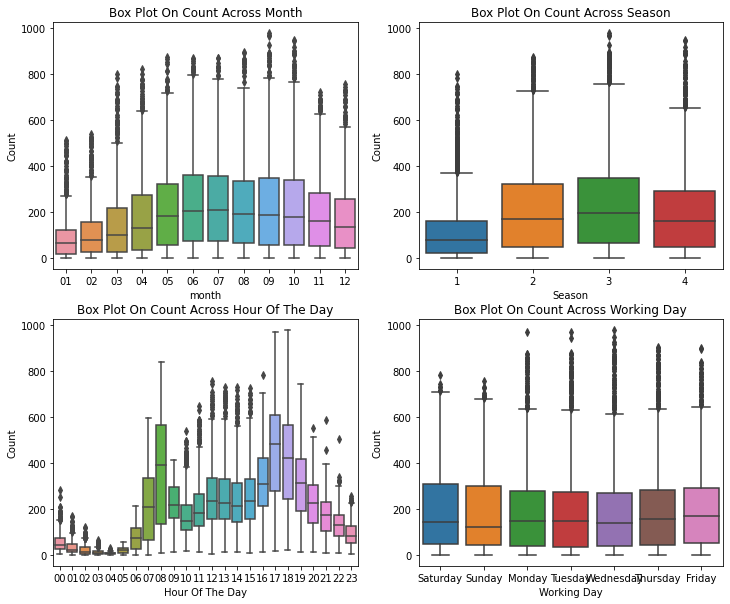

In [234]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=df,y="count",x="month",orient="v",ax=axes[0][0])
sn.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=df,y="count",x="day_of_week",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count Across Month")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

# Remove Outliers In The Count Column
The outlier is any type of data which is more than 3 time of standard deviation away from the mean of data.

In [235]:
df_nooutlayer = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())] 
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_nooutlayer.shape)

Shape Of The Before Ouliers:  (10886, 16)
Shape Of The After Ouliers:  (10739, 16)


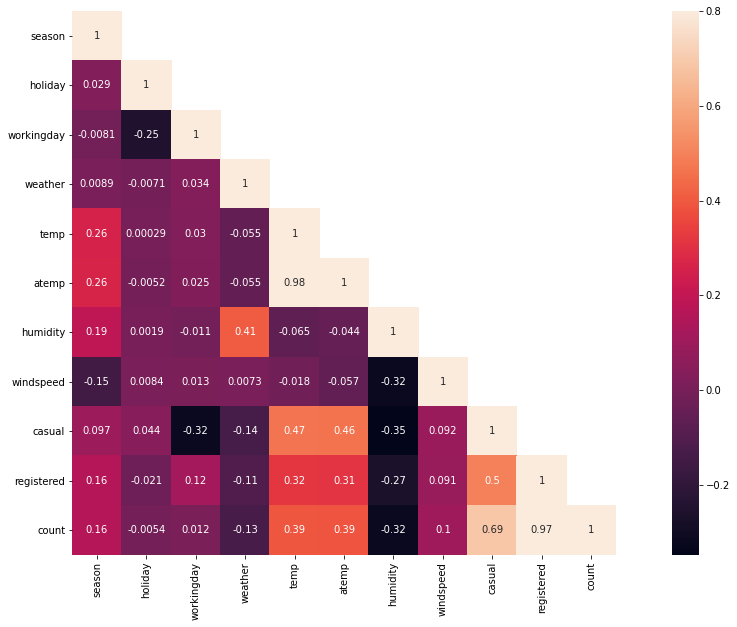

In [236]:
corrMatt = df[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [242]:
category = ["season","holiday","workingday","weather","day_of_week","month","year","hour"]
for var in category:
    df[var] = df[var].astype("category")

# Change the days of weeks names to numbers
df['day_of_week'] = df['day_of_week'].cat.codes

print(df.shape)

df.head()


(10886, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,01,2011,2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,01,2011,2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,01,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,01,2011,2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,01,2011,2


# Count distribution
Since the destribution of count is skewed towards left we can use the log of count which looks more than a normal distrubution.

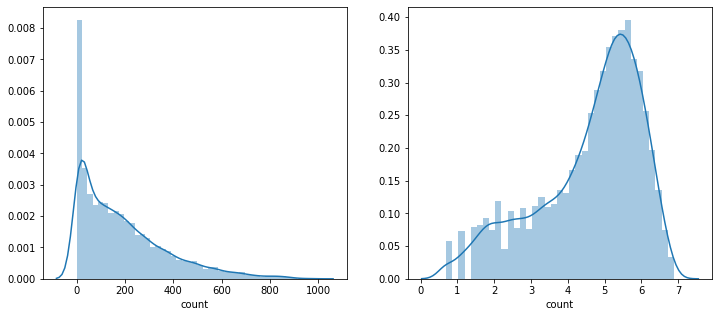

In [250]:
X= df.drop(["casual","count","datetime","registered"], axis=1)
y = df["count"]
y_log = np.log1p(y)


fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sn.distplot(y, ax=ax1)
sn.distplot(y_log, ax=ax2)

In [251]:
sum(pd.isnull(y_log))


0

In [256]:
# Set seed for reproducibility
SEED = 123
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y_log,
                                    test_size=0.3,
                                    random_state=SEED)

# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                min_samples_leaf=0.14,
                random_state=SEED)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE


# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=500, max_features= 'auto', min_samples_leaf= 2,
                           random_state=2)


    
# Fit rf to the training set            
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(np.exp(y_test), np.exp(y_pred))**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 43.58


# Hyperparameter grid of RF

In [257]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


In [258]:
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV


# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)



grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=500, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [169]:
# Extract best hyperparameters from 'grid_rf'

best_hyperparams = grid_rf.best_params_

print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 500}


In [259]:
from sklearn.ensemble import RandomForestRegressor


def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))


rfModel = RandomForestRegressor(n_estimators=100)



rfModel.fit(X_train,y_train)

preds = rfModel.predict(X= X_test)

print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_test),np.exp(preds),False))

RMSLE Value For Random Forest:  0.2955233335032939


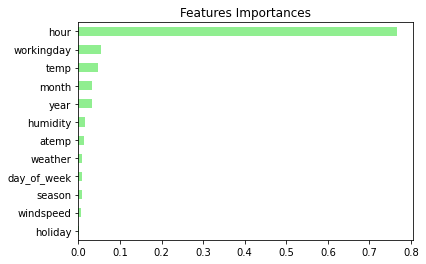

In [260]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [148]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

y_trainlog = np.log1p(y_train)
y_testlog = np.log1p(y_test)


rfModel.fit(X_train,y_trainlog)

preds = rfModel.predict(X= X_test)

print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_testlog),np.exp(preds),False))

Test set RMSE of gb: 47.300
RMSLE Value For Random Forest:  0.29639806531073054


In [25]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.9,
                                 max_features=0.75,
                                 n_estimators=200,                                
                                 random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 55.946
